In [89]:
!pip install pandas
!pip install numpy
!pip install scikit-learn

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Load dataset
df = pd.read_csv('/Databel - Data.csv')

In [92]:
# Display the first few rows of the dataset
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [93]:
# Check for missing values
df.isnull().sum()

,0
Customer ID,0
Churn Label,0
Account Length (in months),0
Local Calls,0
Local Mins,0
Intl Calls,0
Intl Mins,0
Intl Active,0
Intl Plan,0
Extra International Charges,0


In [94]:
# Convert categorical features into numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Churn Label'] = df['Churn Label'].map({'No': 0, 'Yes': 1})

In [95]:
# Check data types
df.dtypes

,0
Customer ID,object
Churn Label,int64
Account Length (in months),int64
Local Calls,int64
Local Mins,float64
Intl Calls,float64
Intl Mins,float64
Intl Active,object
Intl Plan,object
Extra International Charges,float64


# **Exploratory Analysis**


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the 'visualizations' directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

In [100]:
# Assuming 'X' and 'y' are your feature and target data respectively

# Identify categorical features (object type)
categorical_features = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical features
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Impute missing numerical values with the mean (or median)
# You can replace 'mean' with 'median' for a more robust approach if needed
for column in X.select_dtypes(include=np.number).columns:  # Iterate through numerical columns
    X[column] = X[column].fillna(X[column].mean())  # Fill NaN with mean of the column


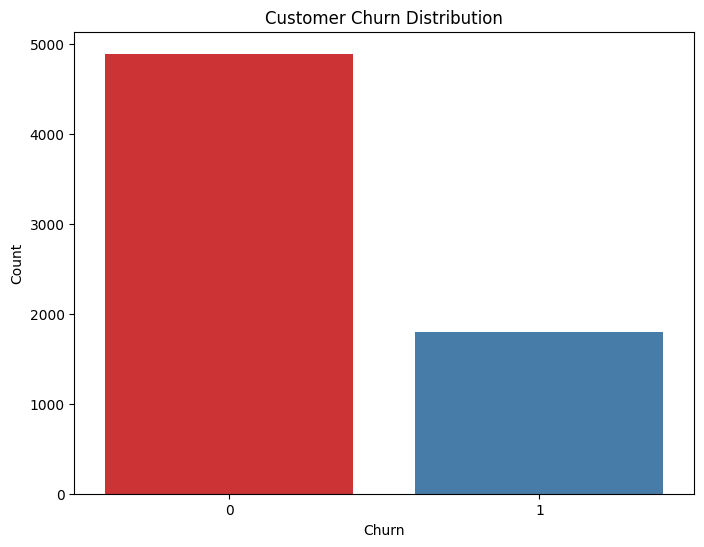

In [97]:
# Visualize the churn distribution
plt.figure(figsize=(8, 6))
# Assign 'Churn Label' to 'hue' and set 'legend=False' for the same effect as 'palette'
sns.countplot(x='Churn Label', data=df, hue='Churn Label', palette='Set1', legend= False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.savefig('visualizations/churn_distribution.png')  # Save the plot
plt.show()

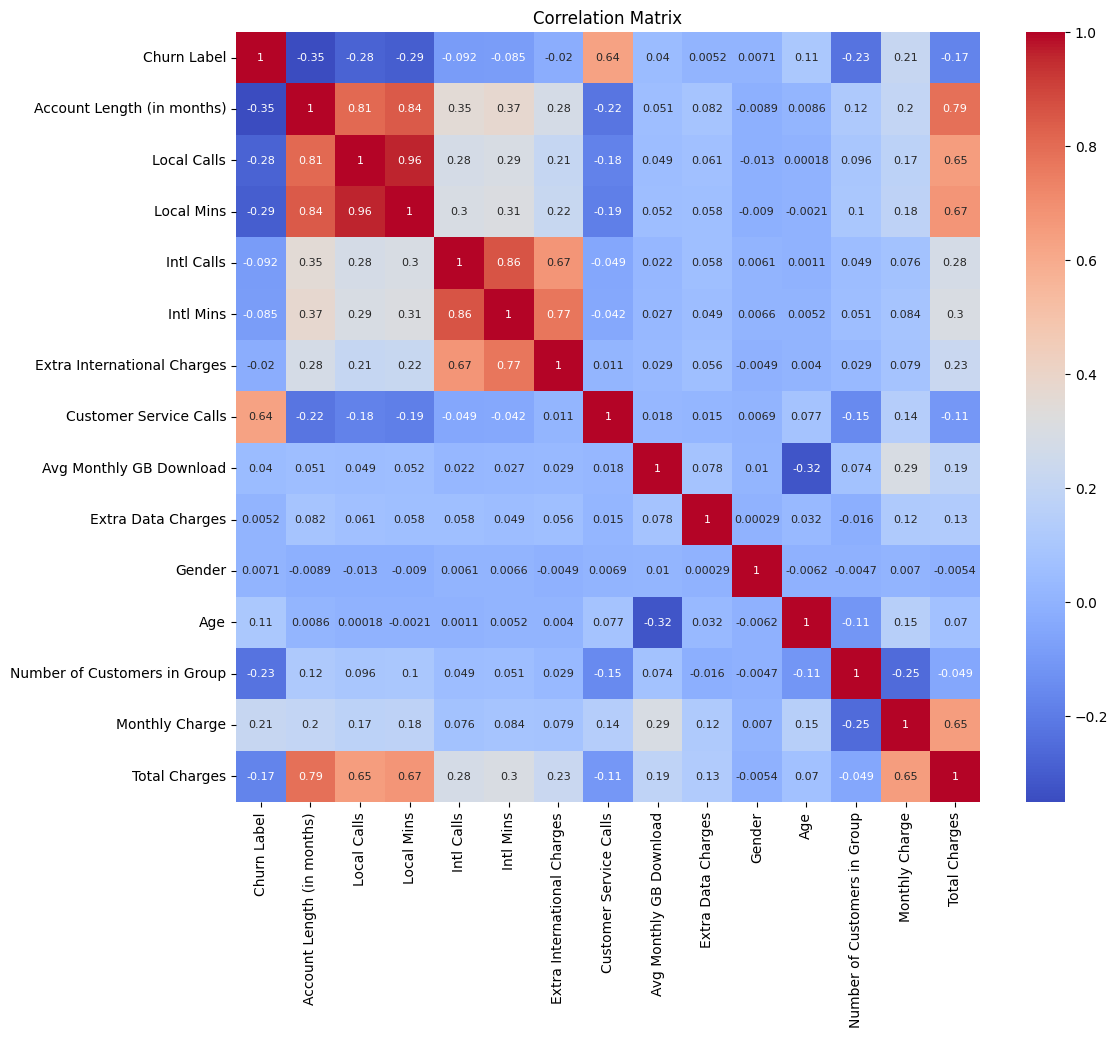

In [98]:
# Visualize the correlation between features
# Select only numeric columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))  # Increase figure size for better clarity
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})  # Adjust font size
plt.title('Correlation Matrix')
plt.savefig('visualizations/correlation_matrix.png')
plt.show()

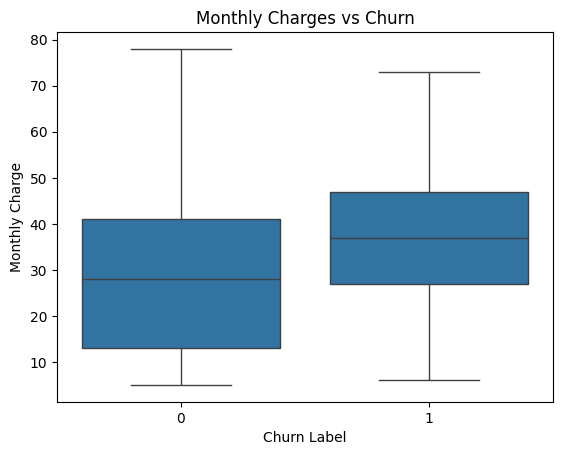

In [99]:
# Box plot of 'Monthly Charges' vs 'Churn'
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)
plt.title('Monthly Charges vs Churn')
plt.savefig('visualizations/monthly_charges_vs_churn.png')
plt.show()

# **Model Bulding**

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [102]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Model 1: logistic regression

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200, random_state=42))
pipeline.fit(X_train, y_train)
y_pred_log_reg = pipeline.predict(X_test)

# Evaluation
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model:
Accuracy: 0.9940209267563528
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       986
           1       1.00      0.98      0.99       352

    accuracy                           0.99      1338
   macro avg       1.00      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



In [105]:
# Model 2 : RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.9940209267563528
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       986
           1       1.00      0.98      0.99       352

    accuracy                           0.99      1338
   macro avg       1.00      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



In [106]:
from sklearn.metrics import roc_auc_score

# For Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("Logistic Regression ROC-AUC:", roc_auc_log_reg)

# For Random Forest
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)


Logistic Regression ROC-AUC: 0.9886363636363636
Random Forest ROC-AUC: 0.9886363636363636


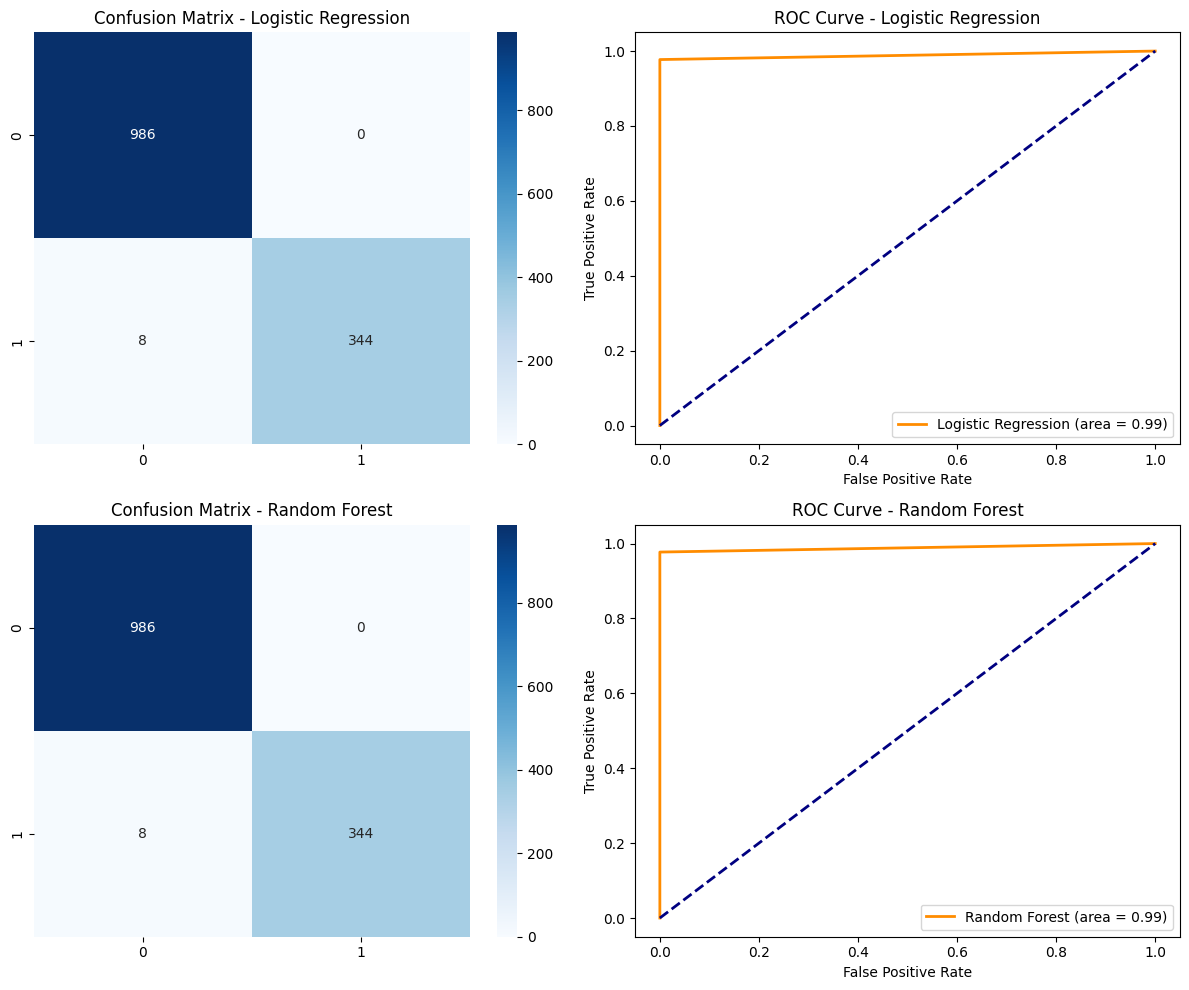

In [107]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Compute ROC curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Compute ROC AUC score
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix for Logistic Regression
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')

# ROC Curve for Logistic Regression
axes[0, 1].plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Logistic Regression (area = {roc_auc_log_reg:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Logistic Regression')
axes[0, 1].legend(loc='lower right')

# Confusion Matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - Random Forest')

# ROC Curve for Random Forest
axes[1, 1].plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve - Random Forest')
axes[1, 1].legend(loc='lower right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('visualizations/compare_models.png')  # Save the comparison plot
plt.show()
